In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
ASSET_DIR = '../'

In [62]:
restarts

{2: [41, 7, 13, 34, 7, 10, 16, 13, 16, 16, 97, 36, 1, 7, 4],
 3: [16, 26, 26, 66, 105, 24, 85, 239, 238, 16, 18, 169, 16, 47, 16]}

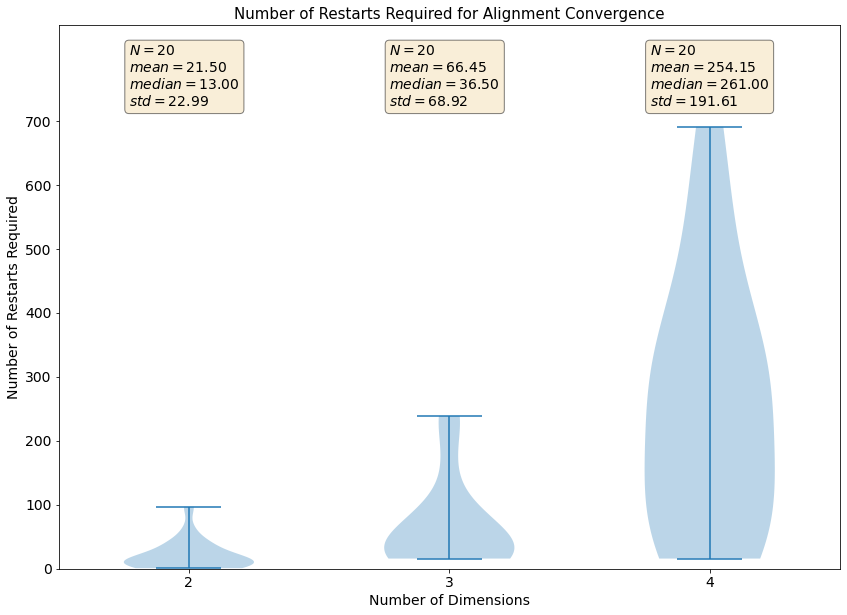

21.5 22.992390045404154 [41, 7, 13, 34, 7, 10, 16, 13, 16, 16, 97, 36, 1, 7, 4, 1, 60, 7, 34, 10]
66.45 68.92276474431361 [16, 26, 26, 66, 105, 24, 85, 239, 238, 16, 18, 169, 16, 47, 16, 17, 48, 78, 63, 16]
254.15 191.60800479103165 [124, 47, 36, 297, 17, 301, 16, 144, 272, 395, 250, 512, 347, 430, 47, 286, 162, 691, 587, 122]


In [166]:
log_dir = '../semi-supervised/logs/baseline'

N = 20

restarts = {2: [], 3:[], 4:[]}
for n_dim in range(2,5):
    for i in range(0,N):
        with open(os.path.join(log_dir, f'n_dim_{n_dim}_{i}.log'), 'r') as r:
            count = 0
            for line in r.readlines():
                if 'Restart' in line:
                    count += 1
            restarts[n_dim].append(count)
                        
# Create the boxplot
plt.figure(figsize=(14,10))
plt.title("Number of Restarts Required for Alignment Convergence", fontsize=15)
plt.violinplot(restarts.values(), positions=list(restarts.keys()))
plt.xticks(np.arange(2,5,1), fontsize=14)
plt.yticks(np.arange(0,800,100), fontsize=14)
plt.xlim(1.5,4.5)
plt.ylim(0,850,100)
plt.xlabel('Number of Dimensions',fontsize=14)
plt.ylabel('Number of Restarts Required',fontsize=14)

# statistical info box
for i in range(2,5):
    mu = np.mean(restarts[i])
    median = np.median(restarts[i])
    sigma = np.std(restarts[i])       

    textstr = '\n'.join((
        r'$N=%.1d$' % (N, ),
        r'$mean=%.2f$' % (mu, ),
        r'$median=%.2f$' % (median, ),
        r'$std=%.2f$' % (sigma, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    plt.text(i-0.23, 820, textstr, fontsize=14, verticalalignment='top', bbox=props)
    
plt.savefig(f'./assets/baseline_restart_counts.pdf')
plt.show()
for n_dim in [2,3,4]:
    print(np.mean(restarts[n_dim]), np.std(restarts[n_dim]), restarts[n_dim])